<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Mandelbrot Set</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch

import tqdm as tq
from tqdm import tqdm

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: fe35d2eb2ca16eae22ed7960707eefda2f5f32bd

tqdm      : 4.62.0
numpy     : 1.19.2
matplotlib: 3.3.2
watermark : 2.1.0
json      : 2.0.9



# Generate a Mandelbrot Set

In [3]:
def mandelbrot(xmin, xmax, ymin, ymax, density=1000):
    xpoints = int((xmax-xmin)*density)
    ypoints = int((ymax-ymin)*density)

    X = np.linspace(xmin, xmax, xpoints)
    Y = np.linspace(ymin, ymax, ypoints)

    maxiter = 50

    Z = np.ones((ypoints, xpoints), dtype='int')*maxiter

    for i in tqdm(range(ypoints), total=ypoints):
        for j in range(xpoints):
            c = complex(X[j], Y[i])
            z = c

            for k in range(maxiter):
                z = z*z+c

                if abs(z) > 2:
                    Z[ypoints-i-1,j] = k
                    break
    return Z

In [4]:
extent1 = (-2, 1, -1, 1)

In [5]:
Z1 = mandelbrot(*extent1, 1000)

100%|██████████| 2000/2000 [00:16<00:00, 122.50it/s]


(-2.0, 1.0, -1.0, 1.0)

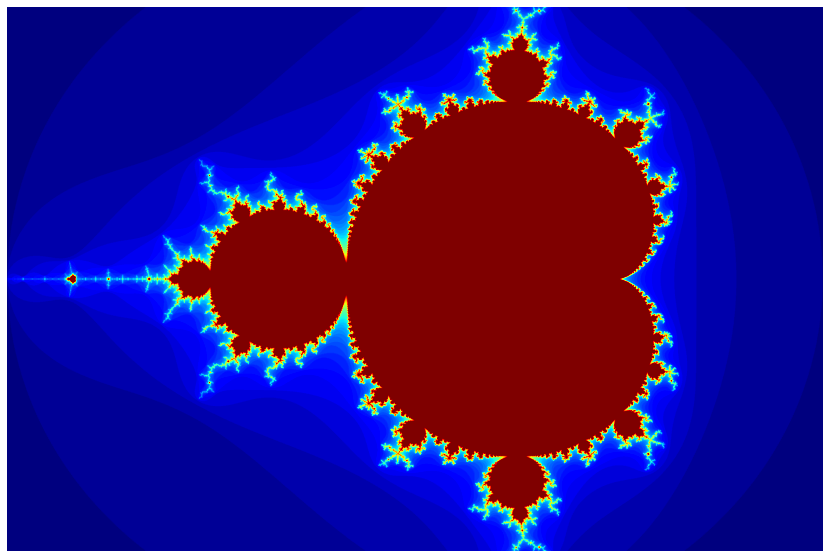

In [6]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.imshow(Z1, extent=extent1, cmap=plt.cm.jet)
ax.axis('off')

In [7]:
extent2 = (-1.25, -1.05, 0.25, 0.35)

(-2.0, 1.0, -1.0, 1.0)

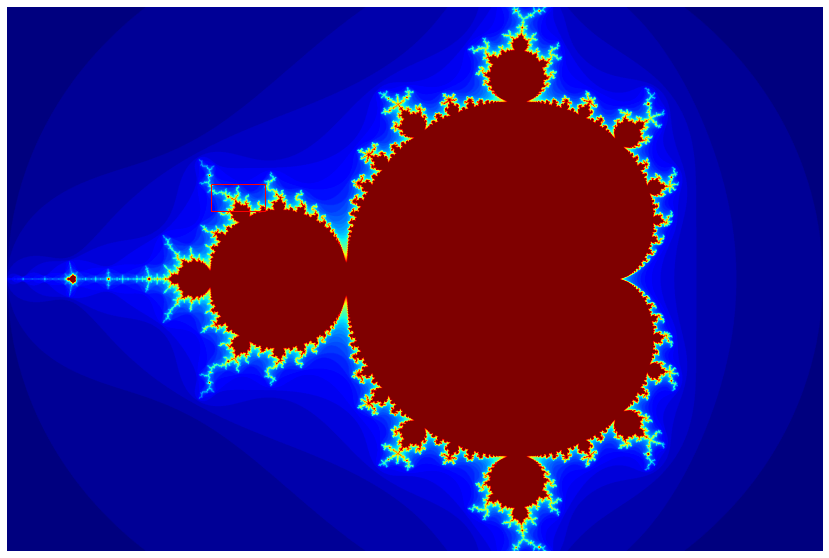

In [8]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.set_aspect(1.)
ax.imshow(Z1, extent=extent1, cmap=plt.cm.jet)
ax.add_patch(Rectangle((extent2[0], extent2[2]), 
                       (extent2[1]-extent2[0]), # width
                       (extent2[3]-extent2[2]), # height
                       edgecolor='red', fill=False))
ax.axis('off')

In [9]:
Z2 = mandelbrot(*extent2, 2000)

100%|██████████| 199/199 [00:00<00:00, 800.44it/s]


(-1.25, -1.05, 0.25, 0.35)

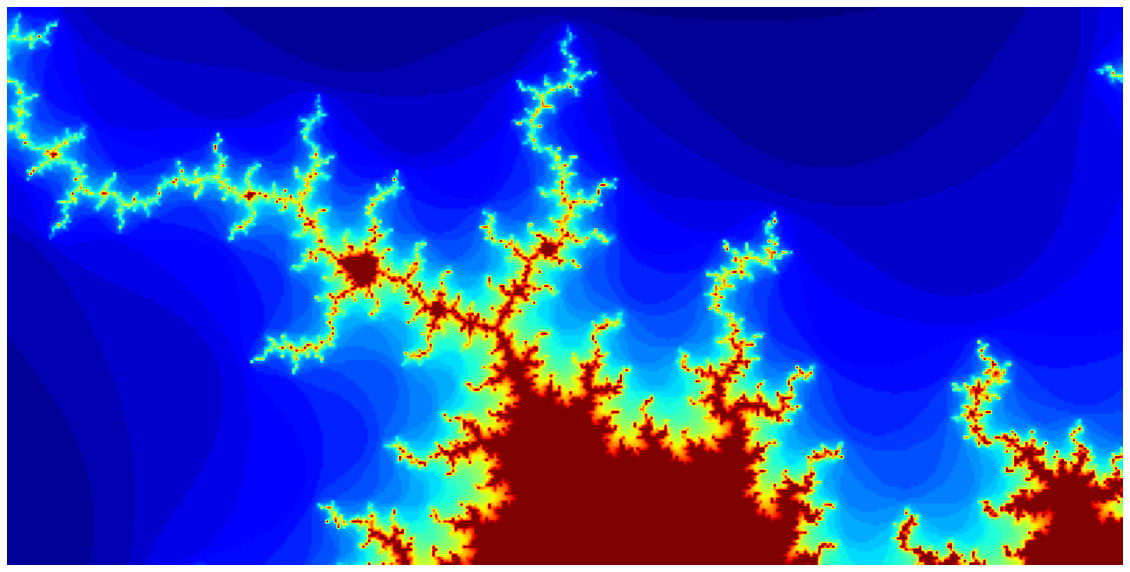

In [10]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.set_aspect(1.)
ax.imshow(Z2, extent=extent2, cmap=plt.cm.jet)
ax.axis('off')

(-1.25, -1.05, 0.25, 0.35)

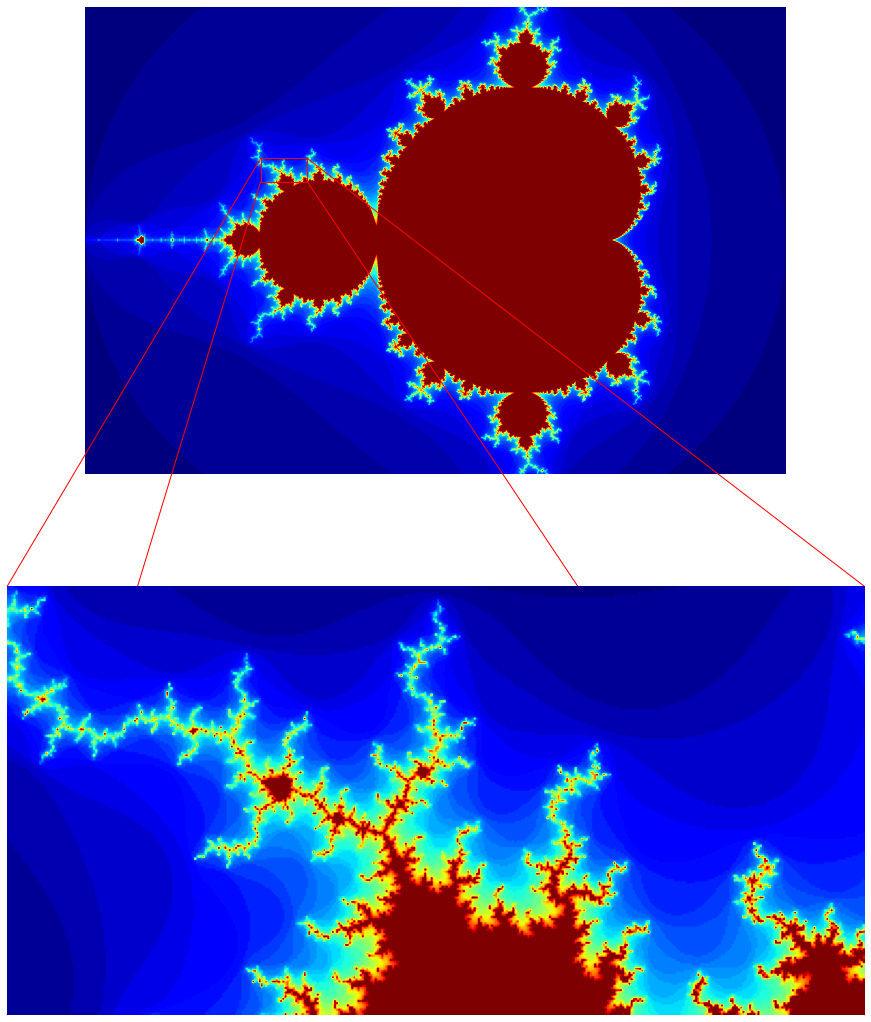

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15.36, 18.9))
ax1.set_aspect(1.)
ax2.set_aspect(1.)

ax1.imshow(Z1, extent=extent1,      cmap=plt.cm.jet)
ax1.add_patch(Rectangle((extent2[0], extent2[2]), 
                        (extent2[1]-extent2[0]), # width
                        (extent2[3]-extent2[2]), # height
                       edgecolor='red', fill=False))

ax2.imshow(Z2, extent=extent2, cmap=plt.cm.jet, zorder=2)
con = ConnectionPatch(xyA=(extent2[0], extent2[2]), # lower left corner
                      xyB=(extent2[0], extent2[2]), # lower left corner
                      coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax2, color="red")
ax2.add_artist(con)

con = ConnectionPatch(xyA=(extent2[0], extent2[3]), # upper left corner
                      xyB=(extent2[0], extent2[3]), # upper left corner
                      coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax2, color="red")
ax2.add_artist(con)


con = ConnectionPatch(xyA=(extent2[1], extent2[2]), # lower right corner
                      xyB=(extent2[1], extent2[2]), # lower right corner
                      coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax2, color="red")
ax2.add_artist(con)


con = ConnectionPatch(xyA=(extent2[1], extent2[3]), # upper right corner
                      xyB=(extent2[1], extent2[3]), # upper right corner
                      coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax2, color="red")
ax2.add_artist(con)

ax1.axis('off')
ax2.axis('off')

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_full.png" style="width: 300px; float: center;" alt="Data For Science, Inc" border="0"> 
</div>